<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/TF2_0'_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, GRU, LSTM, GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
### build the dataset
# This is nonlinear AND long-distance dataset
# (Actually, we will test long-distance vs. short-distance patterns)

#Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  # x = sequence
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) #Short distance
#   y = get_label(x, 0, 1, 2) #Long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [6]:
### try a linear model first - note: it is a classification now
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

#train the RNN
r = model.fit(
    X, Y,
    epochs=100,
    validation_split=0.5
)

Epoch 1/100
79/79 [==============================] - 1s 6ms/step - loss: 0.7712 - accuracy: 0.5008 - val_loss: 0.7045 - val_accuracy: 0.4980
Epoch 2/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6976 - accuracy: 0.4944 - val_loss: 0.6944 - val_accuracy: 0.5060
Epoch 3/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.5108 - val_loss: 0.6956 - val_accuracy: 0.4928
Epoch 4/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5076 - val_loss: 0.6950 - val_accuracy: 0.4880
Epoch 5/100
79/79 [==============================] - 0s 3ms/step - loss: 0.6945 - accuracy: 0.5192 - val_loss: 0.6966 - val_accuracy: 0.4956
Epoch 6/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.5140 - val_loss: 0.6943 - val_accuracy: 0.4960
Epoch 7/100
79/79 [==============================] - 0s 4ms/step - loss: 0.6953 - accuracy: 0.5092 - val_loss: 0.6964 - val_accuracy: 0.5012
Epoch 8/100
7

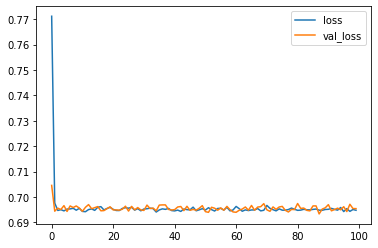

In [8]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

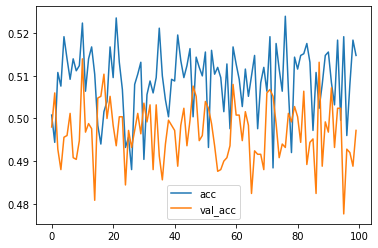

In [9]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [10]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1) #ver que es

# make the RNN
i = Input(shape=(T,D))

#method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU (5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
  #   optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

In [11]:
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 2s 8ms/step - loss: 0.6888 - accuracy: 0.5432 - val_loss: 0.6792 - val_accuracy: 0.5844
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6619 - accuracy: 0.6240 - val_loss: 0.6355 - val_accuracy: 0.7264
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6030 - accuracy: 0.7536 - val_loss: 0.5723 - val_accuracy: 0.7860
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.5196 - accuracy: 0.8236 - val_loss: 0.4696 - val_accuracy: 0.8508
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4120 - accuracy: 0.8796 - val_loss: 0.3575 - val_accuracy: 0.9024
Epoch 6/200
79/79 [==============================] - 0s 5ms/step - loss: 0.3116 - accuracy: 0.9076 - val_loss: 0.2809 - val_accuracy: 0.9128
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.2535 - accuracy: 0.9244 - val_loss: 0.2413 - val_accuracy: 0.9256
Epoch 8/200
7

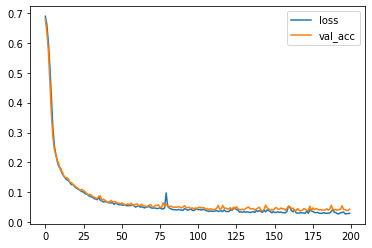

In [12]:
# Plot the loss 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_acc')
plt.legend()

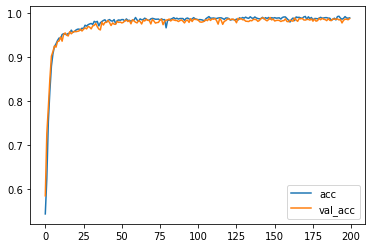

In [13]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [14]:
#now change to the long distance problem
#Start with a small T and increase it later
T = 10
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  # y = get_label(x, -1, -2, -3) #Short distance
  y = get_label(x, 0, 1, 2) #Long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)


In [15]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1) #ver que es

# make the RNN
i = Input(shape=(T,D))

#method 1
# x = LSTM(5)(1)
x = SimpleRNN(5)(i)
# x = GRU (5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
  #   optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

In [16]:
# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 3s 17ms/step - loss: 0.6933 - accuracy: 0.5232 - val_loss: 0.6940 - val_accuracy: 0.5140
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6918 - accuracy: 0.5300 - val_loss: 0.6872 - val_accuracy: 0.5480
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6841 - accuracy: 0.5632 - val_loss: 0.6768 - val_accuracy: 0.5720
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6463 - accuracy: 0.6268 - val_loss: 0.6069 - val_accuracy: 0.6660
Epoch 5/200
79/79 [==============================] - 1s 8ms/step - loss: 0.5081 - accuracy: 0.7668 - val_loss: 0.4809 - val_accuracy: 0.7820
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.4258 - accuracy: 0.8200 - val_loss: 0.3996 - val_accuracy: 0.8248
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.3664 - accuracy: 0.8540 - val_loss: 0.3383 - val_accuracy: 0.8640
Epoch 8/2

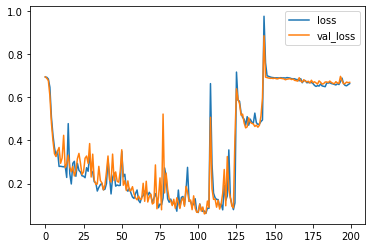

In [17]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [19]:
# Now test our LSTM
inputs = np.expand_dims(X, -1) #ver que es

# make the RNN
i = Input(shape=(T,D))

#method 1
x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU (5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
  #   optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 4s 18ms/step - loss: 0.6942 - accuracy: 0.4808 - val_loss: 0.6943 - val_accuracy: 0.5096
Epoch 2/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6947 - accuracy: 0.4960 - val_loss: 0.6953 - val_accuracy: 0.4956
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6941 - accuracy: 0.5024 - val_loss: 0.6937 - val_accuracy: 0.5068
Epoch 4/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6937 - accuracy: 0.5004 - val_loss: 0.6934 - val_accuracy: 0.4940
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6939 - accuracy: 0.4832 - val_loss: 0.6935 - val_accuracy: 0.5064
Epoch 6/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6932 - accuracy: 0.4912 - val_loss: 0.6939 - val_accuracy: 0.5024
Epoch 7/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6933 - accuracy: 0.5020 - val_loss: 0.6939 - val_accuracy: 0.4932
Epoch 8/

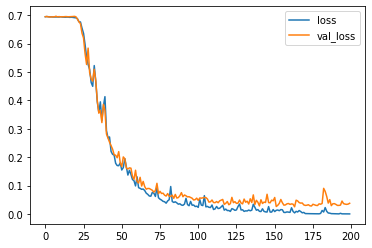

In [20]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

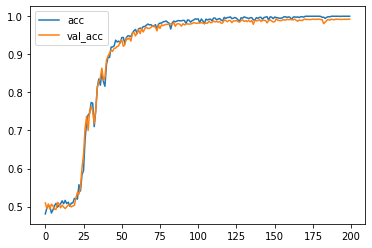

In [21]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [23]:
#Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) #Short distance
#   y = get_label(x, 0, 1, 2) #Long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [26]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1) #ver que es

# make the RNN
i = Input(shape=(T,D))

#method 1
# x = LSTM(5)(1)
x = SimpleRNN(5)(i)
# x = GRU (5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
  #   optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)


Epoch 1/200
79/79 [==============================] - 2s 13ms/step - loss: 0.7021 - accuracy: 0.5212 - val_loss: 0.6836 - val_accuracy: 0.5248
Epoch 2/200
79/79 [==============================] - 1s 13ms/step - loss: 0.6755 - accuracy: 0.5508 - val_loss: 0.6609 - val_accuracy: 0.5732
Epoch 3/200
79/79 [==============================] - 1s 7ms/step - loss: 0.6370 - accuracy: 0.6420 - val_loss: 0.6095 - val_accuracy: 0.6732
Epoch 4/200
79/79 [==============================] - 1s 7ms/step - loss: 0.5670 - accuracy: 0.7496 - val_loss: 0.5159 - val_accuracy: 0.8192
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.4685 - accuracy: 0.8452 - val_loss: 0.4230 - val_accuracy: 0.8700
Epoch 6/200
79/79 [==============================] - 1s 9ms/step - loss: 0.3807 - accuracy: 0.8824 - val_loss: 0.3502 - val_accuracy: 0.8888
Epoch 7/200
79/79 [==============================] - 1s 9ms/step - loss: 0.3266 - accuracy: 0.8956 - val_loss: 0.3073 - val_accuracy: 0.8920
Epoch 8/200

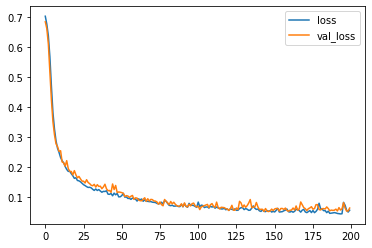

In [27]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

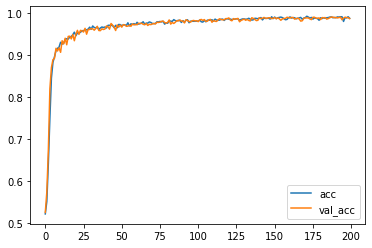

In [28]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [30]:
# Now try our LSTM
inputs = np.expand_dims(X, -1) #ver que es

# make the RNN
i = Input(shape=(T,D))

#method 1
x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU (5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
  #   optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=200,
    validation_split=0.5,
)

Epoch 1/200
79/79 [==============================] - 4s 20ms/step - loss: 0.6935 - accuracy: 0.5236 - val_loss: 0.6953 - val_accuracy: 0.4904
Epoch 2/200
79/79 [==============================] - 1s 15ms/step - loss: 0.6916 - accuracy: 0.5356 - val_loss: 0.6910 - val_accuracy: 0.5172
Epoch 3/200
79/79 [==============================] - 1s 14ms/step - loss: 0.6785 - accuracy: 0.5704 - val_loss: 0.6597 - val_accuracy: 0.5904
Epoch 4/200
79/79 [==============================] - 1s 14ms/step - loss: 0.5920 - accuracy: 0.7036 - val_loss: 0.5028 - val_accuracy: 0.7872
Epoch 5/200
79/79 [==============================] - 1s 15ms/step - loss: 0.4277 - accuracy: 0.8288 - val_loss: 0.3393 - val_accuracy: 0.8976
Epoch 6/200
79/79 [==============================] - 1s 15ms/step - loss: 0.2719 - accuracy: 0.9324 - val_loss: 0.2190 - val_accuracy: 0.9404
Epoch 7/200
79/79 [==============================] - 1s 15ms/step - loss: 0.1840 - accuracy: 0.9500 - val_loss: 0.1609 - val_accuracy: 0.9520
Epoch 

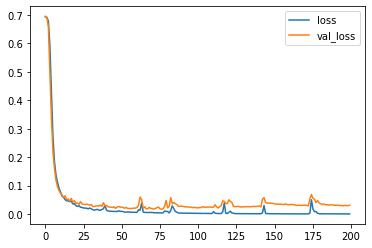

In [31]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

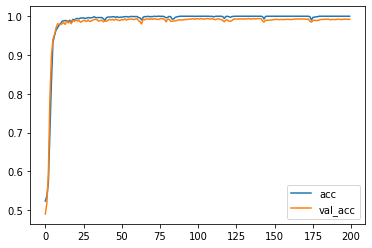

In [32]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [33]:
# Now try a simple RNN
inputs = np.expand_dims(X, -1) #ver que es

# make the RNN
i = Input(shape=(T,D))

#method 1
# x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
x = GRU (5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
  #   optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 4s 18ms/step - loss: 0.6946 - accuracy: 0.4952 - val_loss: 0.6912 - val_accuracy: 0.5252
Epoch 2/400
79/79 [==============================] - 1s 14ms/step - loss: 0.6908 - accuracy: 0.5248 - val_loss: 0.6814 - val_accuracy: 0.6284
Epoch 3/400
79/79 [==============================] - 1s 15ms/step - loss: 0.6214 - accuracy: 0.6648 - val_loss: 0.5403 - val_accuracy: 0.7368
Epoch 4/400
79/79 [==============================] - 1s 13ms/step - loss: 0.4599 - accuracy: 0.7936 - val_loss: 0.3970 - val_accuracy: 0.8328
Epoch 5/400
79/79 [==============================] - 1s 16ms/step - loss: 0.3451 - accuracy: 0.8672 - val_loss: 0.3100 - val_accuracy: 0.8916
Epoch 6/400
79/79 [==============================] - 1s 13ms/step - loss: 0.2743 - accuracy: 0.9056 - val_loss: 0.2470 - val_accuracy: 0.9172
Epoch 7/400
79/79 [==============================] - 1s 15ms/step - loss: 0.2159 - accuracy: 0.9320 - val_loss: 0.1986 - val_accuracy: 0.9396
Epoch 

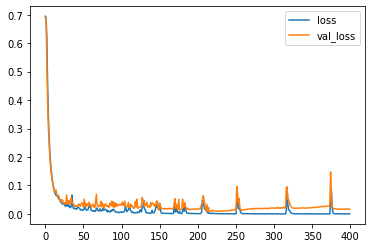

In [34]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

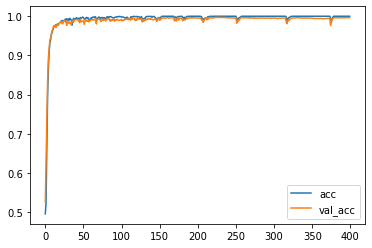

In [35]:
# Plot the accuracy too
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend() #En teoria el modelo GRU le cuesta mas trabajo aprender los patrones con un T = 20

In [47]:
# Make the problem even harder by making T larger 
T = 30
D = 1
X = []
Y = []

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) #Short distance
#   y = get_label(x, 0, 1, 2) #Long distance
  Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [38]:
# now test our LSTM
inputs = np.expand_dims(X, -1) #ver que es

# make the RNN
i = Input(shape=(T,D))

#method 1
x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU (5)(i)

# method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
  #   optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=400,
    validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 6s 35ms/step - loss: 0.6943 - accuracy: 0.5024 - val_loss: 0.6924 - val_accuracy: 0.4960
Epoch 2/400
79/79 [==============================] - 2s 30ms/step - loss: 0.6920 - accuracy: 0.5400 - val_loss: 0.6905 - val_accuracy: 0.5416
Epoch 3/400
79/79 [==============================] - 2s 27ms/step - loss: 0.6864 - accuracy: 0.5528 - val_loss: 0.6740 - val_accuracy: 0.5896
Epoch 4/400
79/79 [==============================] - 2s 28ms/step - loss: 0.5976 - accuracy: 0.6936 - val_loss: 0.4754 - val_accuracy: 0.8184
Epoch 5/400
79/79 [==============================] - 2s 28ms/step - loss: 0.3520 - accuracy: 0.8880 - val_loss: 0.2740 - val_accuracy: 0.9132
Epoch 6/400
79/79 [==============================] - 2s 25ms/step - loss: 0.2210 - accuracy: 0.9360 - val_loss: 0.1928 - val_accuracy: 0.9436
Epoch 7/400
79/79 [==============================] - 2s 24ms/step - loss: 0.1630 - accuracy: 0.9536 - val_loss: 0.1641 - val_accuracy: 0.9504
Epoch 

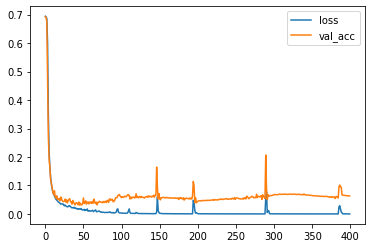

In [39]:
# Plot the loss 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_acc')
plt.legend()

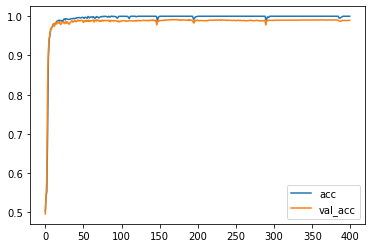

In [40]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend() #Alcanzamos el máximo para el LSTM, al parecer con T = 30 explota. 

In [48]:
# now test our LSTM
inputs = np.expand_dims(X, -1) #ver que es

# make the RNN
i = Input(shape=(T,D))

#method 1
# x = LSTM(5)(i)
# x = SimpleRNN(5)(i)
# x = GRU (5)(i)

# method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPool1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i,x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
  #   optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

# train the RNN
r = model.fit(
    inputs, Y,
    epochs=100,
    validation_split=0.5,
)

Epoch 1/100
79/79 [==============================] - 4s 24ms/step - loss: 0.6943 - accuracy: 0.5072 - val_loss: 0.6931 - val_accuracy: 0.5120
Epoch 2/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6933 - accuracy: 0.5104 - val_loss: 0.6941 - val_accuracy: 0.4844
Epoch 3/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6935 - accuracy: 0.5112 - val_loss: 0.6948 - val_accuracy: 0.4776
Epoch 4/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6938 - accuracy: 0.5148 - val_loss: 0.6967 - val_accuracy: 0.4816
Epoch 5/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6926 - accuracy: 0.5180 - val_loss: 0.6938 - val_accuracy: 0.4992
Epoch 6/100
79/79 [==============================] - 1s 19ms/step - loss: 0.6924 - accuracy: 0.5164 - val_loss: 0.6957 - val_accuracy: 0.4724
Epoch 7/100
79/79 [==============================] - 1s 18ms/step - loss: 0.6922 - accuracy: 0.5196 - val_loss: 0.6953 - val_accuracy: 0.4824
Epoch 

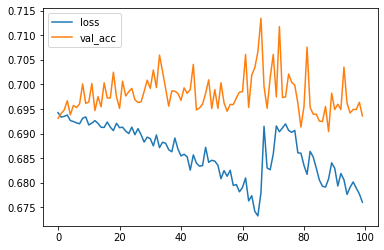

In [49]:
# Plot the loss 
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_acc')
plt.legend()

el LSTM por defecto, solo devuelve los últimos 10 y establece cada objeto y eso considera la salida

return_sequences=False
  input: T x D
  After RNN Unit h(T): M
  Output: K

return_sequences=True # aquí tendras todos los estados ocultos para cada paso del tiempo
  input: T x D
  After RNN Unit h(1),h(2),...,h(T) T x M
  After global max pooling max {h(1),h(2),...,h(T)}: M
  Output: K

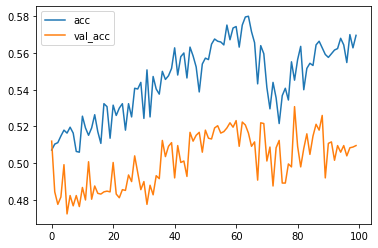

In [50]:
# Plot the accuracy too - should be around 50%
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend() #Con este segundo método, con 100 epochs puede aún jalar dado un T =30

Summary

Simple RNN

GRU

LSTM

LSTM + Global Max Pooling